# Business Problem Understanding








## Stakeholder
  Model ML kali ini akan digunakan oleh para pemilik properti apartmen yang akan menawarkan propertinya kepada pembeli. 



## Problem Statement
Masalahnya adalah pemilik properti harus menentukan harga jual berdasarkan variabel-variabel yang akan dibahas nanti sehingga harganya bisa "pas".


## Why Important ?
 Maksud "pas" disini adalah tidak terlalu tinggi yang bisa mengakibatkan sedikitnya peminat dan juga tidak terlalu rendah hingga profitnya tidak maksimal. 


## Objective
Tujuannya tentu adalah agar properti mereka bisa terjual dengan jumlah peminat dan harga yang optimum, sehingga kembali lagi profit yang didapatkan oleh pemilik properti bisa maksimum




Dataset yang diberikan berupa beberapa fitur properti yang tersedia di Daegu.
Beberapa fitur dari dataset yang telah didapatkan adalah sebagai berikut

*   Hallway Type: Apartment type
*   TimeToSubway: Waktu yang diperlukan untuk mencapai subway terdekat
*   SubwayStation: Nama dari subway terdekat
*   N_FacilitiesNearBy(ETC): Jumlah fasilitas terdekat
*   N_FacilitiesNearBy(PublicOffice): Jumlah fasilitas kantor publik terdekat
*   N_SchoolNearBy(University): Jumlah universitas terdekat
*   N_Parkinglot(Basement): Jumlah parking lot
*   YearBuilt: Tahun dibuatnya apartmen
*   N_FacilitiesInApt: Jumlah fasilitas apartmen
*   Size(sqft): Luas Apartmen(in square feet)
*   SalePrice: THarga apartmen (Won)

In [1]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Model Selection & Tuning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Algoritma Modelling Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning, Feature Selection, dan Feature engineering
Explanatory Data Analysis tidak akan disertakan disini.

## Data Cleaning


In [3]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.shape


(4123, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


### Cek duplikat
Untuk menghindari bias dan penghitungan dua kali, data duplikat perlu didrop

In [5]:
# cek duplikat dikeseluruhan dataframe
df.duplicated().sum()

1422

In [6]:
# drop salah satu data duplikat
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
# cek jumlah baris setelah drop data duplikat
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


### Cek missing values
Nilai missing values perlu dianalisa dan diisi atau didrop sesuai keadaan

In [8]:
def missing_values(df):
    missing_values = df.isnull().sum().to_frame().reset_index()
    missing_values = missing_values.rename(columns = {'index': 'column', 0: 'number of missing values'})
    missing_values['% missing values'] = (missing_values['number of missing values']/df.shape[0]*100).round(2)
    return missing_values

missing_values(df)

,column,number of missing values,% missing values
0,HallwayType,0,0.0
1,TimeToSubway,0,0.0
2,SubwayStation,0,0.0
3,N_FacilitiesNearBy(ETC),0,0.0
4,N_FacilitiesNearBy(PublicOffice),0,0.0
5,N_SchoolNearBy(University),0,0.0
6,N_Parkinglot(Basement),0,0.0
7,YearBuilt,0,0.0
8,N_FacilitiesInApt,0,0.0
9,Size(sqf),0,0.0


Tidak ada missing values

### Outliers

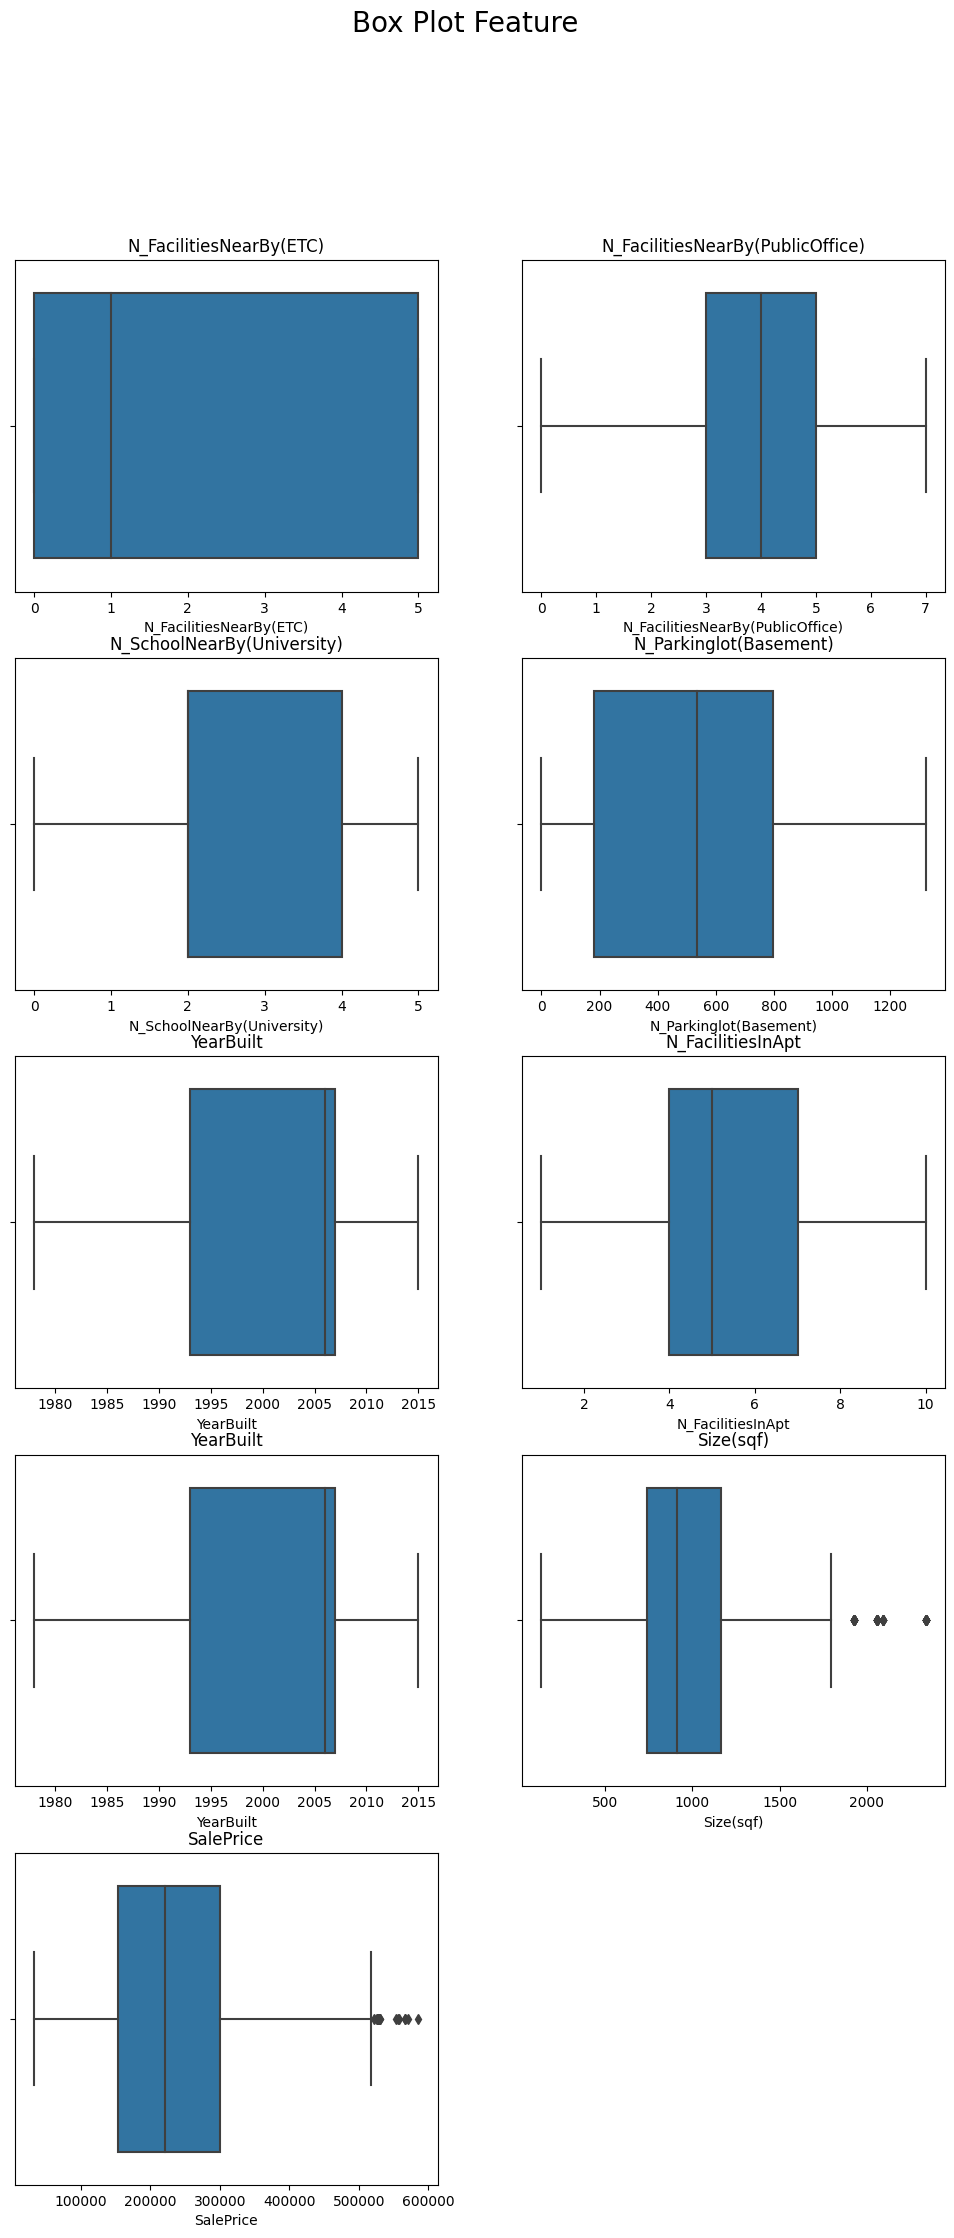

In [9]:
plt.figure(figsize=(12,25))

columns=['N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)','N_Parkinglot(Basement)','YearBuilt','N_FacilitiesInApt','YearBuilt','Size(sqf)','SalePrice']

plotnumber=1
for kolom in columns:
    plt.subplot(5,2,plotnumber)
    sns.boxplot(data=df,x=kolom)
    plt.title(kolom)

    plotnumber +=1

plt.suptitle('Box Plot Feature',size=20)
plt.show()

Terlihat pada SalePrice dan Size(sqf) ada beberapa outliers

In [10]:
# Membuat fungsi untuk mengecek outliers
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower = q1 - limit
    upper = q3 + limit
    print(f'limit_bawah: {lower}')
    print(f'limit_atas: {upper}')     

In [11]:
# Cek deskriptif statistik kolom SalePrice
df['SalePrice'].describe()

count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [12]:
# Outliers pada fitur 'SalePrice'
outliers(df['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5


In [13]:
# Drop data outlier pada data 'SalePrice'
df = df[df['SalePrice'] <= 521901.5]

In [14]:
# Cek deskriptif statistik kolom 'SalePrice' setelah drop Outliers
df['SalePrice'].describe()

count      2684.000000
mean     227524.476528
std      102380.847211
min       32743.000000
25%      153097.000000
50%      220088.000000
75%      297455.500000
max      517699.000000
Name: SalePrice, dtype: float64

In [15]:
# Cek deskriptif statistik kolom Size(sqf)
df['Size(sqf)'].describe()

count    2684.000000
mean      978.779434
std       387.404559
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [16]:
# Outliers pada fitur 'Size(sqf)'
outliers(df['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [17]:
# Drop data outlier pada data 'Size(sqf)'
df = df[df['Size(sqf)'] <= 1803.0]


In [18]:
# Cek deskriptif statistik kolom 'Size(sqf)' setelah drop Outliers
df['Size(sqf)'].describe()

count    2611.000000
mean      946.851015
std       340.673791
min       135.000000
25%       743.000000
50%       910.000000
75%      1149.000000
max      1796.000000
Name: Size(sqf), dtype: float64

Dilakukan drop data outlier pada fitur SalePrice dengan batas atas yaitu 521901.5 Won. Maka, data yang digunakan hanya apartment yang memiliki harga jual kurang dari dengan 521901 Won.

Dilakukan drop data outlier pada fitur Size(sqf) dengan batas atas yaitu 1803.0 sqf. Maka, data yang digunakan hanya apartment yang memiliki luas kurang dari dengan 1803.0 sqf.

Nantinya model ini akan memiliki limitasi keyakinan valid yaitu untuk properti yang harga jual melebihi 521901 won dan juga luas properti melebihi 1803 sqf.


# Feature Selection

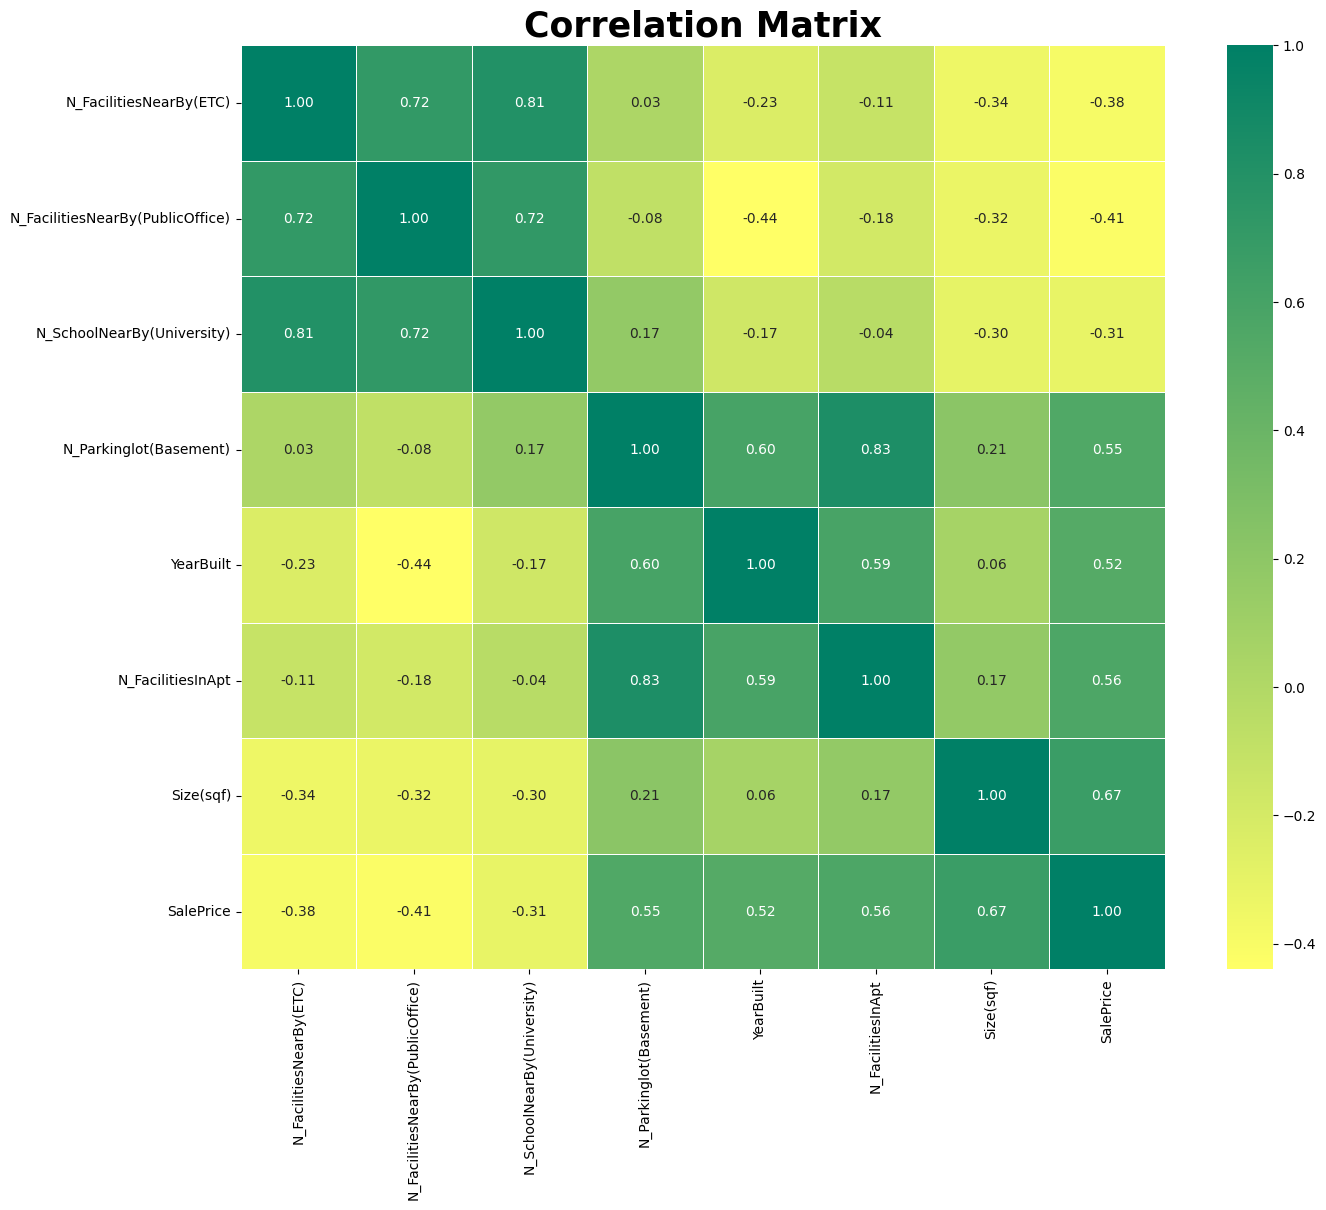

In [19]:
# Correlation Matrix
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='summer_r',  fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=25, weight='bold');

Terlihat bahwa luas properti sangan berpengaruh terhadap harga yaitu dengan nilai korelasi 0,67.

Sekilas semua feature memiliki nilai korelasi medium dengan rentang 0,31-0,67 terhadap harga properti, yang artinya semua feature memiliki hubungan atau keterkaitan dengan harga apartment dan sudah dipastikan bahwa semua feature muncul sebelum label yaitu harga apartment sehingga semua feature bisa digunakan untuk melakukan prediksi properti.

# Feature Engineering

## Scalling

Dalam dataset terdapat fitur yang memiliki rentang yang cukup jauh yaitu fitur N_Parkinglot(Basement) dan Size(Sqf). Maka saya akan melakukan Robust Scaler pada fitur N_Parkinglot(Basement) dan Size(sqf) karena metode ini dapat memperbaiki konsistensi data yang memiliki nilai outliers dan distribusi data yang skewed sehingga mengurangi pengaruh nilai-nilai ekstrim pada hasil analisis.

## Encoding
Dalam dataset terdapat beberapa feature yang merupakan data kategorikal sehingga kita perlu untuk melakukan encoding pada data kategorikal tersebut. Encoding yang akan dilakukan adalah sebagai berikut:



*   HallwayType dilakukan encoding menggunakan OneHotEncoding karena hanya memiliki 3 kategori
*   SubwayStation dilakukan encoding menggunakan Binary Encoding karena hanya memiliki 8 kategori
*   TimeToSubway dilakukan encoding menggunakan Ordinal Encoding karena data akan diurutkan menjadi semakin tinggi nilai skor kategori semakin bagus yang artinya semakin dekat dengan Subway





In [20]:
# Ordinal Maping, mengubah menjadi
ordinalmap = [{'col':'TimeToSubway', 'mapping':{'0-5min':4, '5min~10min':3, '10min~15min':2, '15min~20min':1, 'no_bus_stop_nearby':0,} }]

Ordinal_Encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinalmap)

# Melakukan Encoding
transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(), ['HallwayType']),
    ('Binary', ce.BinaryEncoder(), ['SubwayStation']),
    ('Ordinal', Ordinal_Encoder, ['TimeToSubway'])
], remainder='passthrough')     # remainder digunakan untuk menghandle Kolom yang tidak di define di Transformer

# Analytics (Algorithm & Evaluation Metrics)

In [21]:
# Splitting data menjadi data independent dan data dependent/target
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [22]:
# Splitting data menjadi data train dan data test dengan proporsi 80 : 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

## Algoritma dan Evaluation Matrix

Beberapa model regresi yang akan digunakan dalam pemilihan benchmark model adalah sebagai berikut:



1.   Linear Regression 

Model yang digunakan untuk memodelkan hubungan linier antara satu atau beberapa variabel input dan variabel target.
2.   KNN
Model regresi berbasis algoritma K-Nearest Neighbors (KNN) dengan mencari K tetangga terdekat dari data input yang ingin diprediksi dan kemudian melakukan prediksi variabel target numerik.
3.   Decision Tree
Model regresi dalam bentuk struktur decision tree yang terdiri dari serangkaian node dan edge.
4.   Random Forest
Model regresi yang membangun beberapa decision tree secara acak dengan menggunakan subset data training yang berbeda-beda dan subset fitur yang acak dari dataset yang tersedia dan setiap decision tree dihasilkan dengan menggunakan teknik bootstrap sampling dan feature bagging.
5.   XGBoost
Model regresi yang memanfaatkan teknik gradient boosting dengan pendekatan ensemble learning.

Evaluation Matrix yang akan adalah

Mean Absolute Error (MAE):
MAE adalah metrik evaluasi yang mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. MAE juga digunakan untuk mengukur kesalahan prediksi model. 

Alasan penggunaaan MAE antara lain:


1.   Interpretasi yang mudah: MAE memiliki interpretasi yang intuitif karena mengukur kesalahan prediksi secara absolut dalam satuan yang sama dengan variabel target 
2.   Kesalahan absolut: MAE mengukur kesalahan absolut, yang berarti kesalahan prediksi positif dan negatif memiliki pengaruh yang sama terhadap nilai MAE. Ini bermanfaat ketika kesalahan prediksi dengan arah yang berlawanan dapat saling menghapus, dan kesalahan yang lebih kecil tetap memberikan kontribusi yang signifikan terhadap penilaian model.
3.  Ketahanan terhadap outlier: MAE lebih tahan terhadap outlier daripada metrik evaluasi lainnya seperti MSE. Ini berarti jika terdapat beberapa prediksi yang jauh dari nilai sebenarnya (outlier), kesalahan tersebut tidak akan mempengaruhi nilai MAE secara berlebihan. Hal ini memungkinkan model lebih fokus pada rata-rata kesalahan prediksi keseluruhan daripada terpengaruh oleh beberapa prediksi yang ekstrem.






In [23]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=20)
rf = RandomForestRegressor(random_state=20)
xgb = XGBRegressor(random_state=20)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []


# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=20) # Jumlah Fold

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

[-40627.57333736 -44987.21337254 -42385.4706561  -42971.68928573
 -44641.63978256] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-34860.30659122 -40156.3216572  -37377.78771951 -39998.84202062
 -36825.16577352] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-33172.78491813 -37906.6117637  -36295.43866306 -38316.83066102
 -35931.18017866] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=DecisionTreeRegressor(random_state=20))
[-33030.69842506 -38023.40016671 -36161.68856246 -38527.70960217
 -36085.29055223] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=20))
[-32994.27054987 -37864.46735758 -35897.77388606 -37775.48661383
 -35937.66159885] TransformedTar

In [24]:
model_matrix_train=pd.DataFrame({
    'Model': ['Training Linear Regression', 'Training KNN Regressor', 'Training DecisionTree Regressor', 'Training RandomForest Regressor', 'Training XGBoost Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,})

print('Hasil Training ')
model_matrix_train.sort_values(by='Mean_MAE', ascending=False)

Hasil Training 


,Model,Mean_MAE,Std_MAE
4,Training XGBoost Regressor,-36093.932001,1768.231937
2,Training DecisionTree Regressor,-36324.569237,1819.962201
3,Training RandomForest Regressor,-36365.757462,1932.083900
1,Training KNN Regressor,-37843.684752,2007.385290
0,Training Linear Regression,-43122.717287,1585.910249


Berdasarkan hasil training di atas, terdapat 3 model algoritma yang memiliki nilai terbaik yaitu XGBoost, DecisionTree, RandomForest. Hal itu dapat dilihat dari nilai Mean Absolute Error (MAE) yang rendah. Selain itu Standar Deviasi ketiga model tersebut sama-sama cukup rendah. Karena ketiganya memiliki perbedaan yang cukup kecil pada mean maupun standar deviasi, maka saya akan menggunakan ketiganya untuk dilakukan prediksi pada test set.

In [25]:
# Benchmark 3 model terbaik
models = {
    'DecisionTree Regression': DecisionTreeRegressor(random_state=20),
    'RandomForest Regression': RandomForestRegressor(random_state=20),
    'XGBoost Regression': XGBRegressor(random_state=20)}

score_mae = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_mae.append(mean_absolute_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae}, index=models.keys())

print('Hasil Testing Sebelum Tuning')
score_before_tuning.sort_values(by='MAE')

Hasil Testing Sebelum Tuning


,MAE
XGBoost Regression,36347.939427
RandomForest Regression,36404.130124
DecisionTree Regression,36404.322828


## Hyperparameter tuning

hyperparameter tuning untuk mencari kombinasi parameter terbaik pada sebuah model machine learning dengan tujuan meningkatkan performa dan akurasi dari model tersebut. 

Saat ini saya menggunakan metode RandomizedSearchCV untuk melakukan hyperparameter Tuning karena tidak memakan waktu yang lama dan saya juga menggunakan 3 algoritma, walaupun RandomizedSearchCV tidak menjamin mendapatkan nilai terbaik.

In [26]:
# XGBoost Tuning

# Kedalaman pohon, Nilainya Integer
max_depth = list(np.arange(1, 11))

# Learning rate, Nilainya Float
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon, memiliki rentang dalam ratusan, Nilainya Integer
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease), Berapa error yang diharapkan turun agar Tree bisa Split, Nilainya Float
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=20, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=20)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1

)

# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45306.86146173744
Best_params: {'model__subsample': 0.8, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 190, 'model__max_depth': 3, 'model__learning_rate': 0.48, 'model__gamma': 9, 'model__colsample_bytree': 0.2}


In [27]:
# Decision Tree Tuning
hyperparam_space_dt = {
    'model__max_depth': list(range(1, 21)),            # Kedalaman pohon
    'model__max_features': list(range(1, 6)),          # Jumlah feature untuk tiap splitting
    'model__min_samples_split': list(range(2, 20)),    # Jumlah sample sebelum splitting
    'model__min_samples_leaf' : list(range(2, 10))     # Jumlah sample sesudah splitting
}

# Model 2 dengan hyperparameter tuning
dt = DecisionTreeRegressor(random_state=20)

# Membuat algorithm chains
estimator_dt = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', dt)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=20)

# Hyperparameter tuning
random_dt = RandomizedSearchCV(
    estimator_dt,
    param_distributions = hyperparam_space_dt,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 0
)

# Fitting data training untuk mencari parameter terbaik
random_dt.fit(X_train, y_train)

# Cek skor dan params terbaik
print('Decision Tree Regressor')
print('Best_score:', random_dt.best_score_)
print('Best_params:', random_dt.best_params_)
                                                                               
                                                                               
                                                                               
                                                                      

Decision Tree Regressor
Best_score: -46201.397872325884
Best_params: {'model__min_samples_split': 6, 'model__min_samples_leaf': 2, 'model__max_features': 4, 'model__max_depth': 20}


In [28]:
# Random Forest Tuning

# Jumlah pohon pada random forest
n_estimators = list(np.arange(100, 201))

# Jumlah fitur yang perlu dipertimbangkan di setiap split
max_features = list(np.arange(2, 11))

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah minimum sampel yang diperlukan untuk split sebuah node
min_samples_split = list(np.arange(2, 21))

# Jumlah minimum sampel yang diperlukan pada setiap leaf
min_samples_leaf = list(np.arange(1, 21))


hyperparam_space_rf = {
    'model__n_estimators': n_estimators,                # Jumlah pohon
    'model__max_features': max_features,                # Jumlah feature untuk tiap splitting
    'model__max_depth': max_depth,                      # Kedalaman pohon
    'model__min_samples_split': min_samples_split,      # Jumlah sample sebelum splitting
    'model__min_samples_leaf': min_samples_leaf,}       # Jumlah sample sesudah splitting
# Model 3 dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=20)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=20)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 0
)
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

# Cek skor dan params terbaik
print('RandomForest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest Regressor
Best_score: -45532.9509813301
Best_params: {'model__n_estimators': 109, 'model__min_samples_split': 8, 'model__min_samples_leaf': 1, 'model__max_features': 3, 'model__max_depth': 8}


Sekarang ke 3 algoritma yang sudah dituning akan kembali di test 

In [29]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=20)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'MAE': mae_xgb_tuning}, index=model.keys())

In [30]:
# Model Decision Tree
model = {'DecisionTree': DecisionTreeRegressor(random_state=20)}

# Define model terhadap estimator terbaik
dt_tuning = random_dt.best_estimator_

# Fitting model
dt_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_dt_tuning = dt_tuning.predict(X_test)

# Simpan nilai metrics RMSE setelah tuning
mae_dt_tuning =  mean_absolute_error(y_test, y_pred_dt_tuning)

score_after_tuning_dt = pd.DataFrame({'MAE': mae_dt_tuning}, index=model.keys())

In [31]:
# Model randomforest
model = {'RandomForest': RandomForestRegressor(random_state=20)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Prdict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE setelah tuning
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'MAE': mae_rf_tuning}, index=model.keys())

In [32]:
before_after = pd.DataFrame({
    'Model': ['XGBoost','Decision Tree', 'RandomForest'],
    'MAE Before Tuning': [score_before_tuning.loc['XGBoost Regression']['MAE'], score_before_tuning.loc['DecisionTree Regression']['MAE'], score_before_tuning.loc['RandomForest Regression']['MAE']],
    'MAE After Tuning': [mae_xgb_tuning, mae_dt_tuning, mae_rf_tuning]})

    
before_after.sort_values(by='MAE After Tuning', ascending=True)

,Model,MAE Before Tuning,MAE After Tuning
0,XGBoost,36347.939427,36027.518754
2,RandomForest,36404.130124,36255.648479
1,Decision Tree,36404.322828,36461.668372


Setelah dilakukan Hyperparameter Tuning nilai MAE paling baik tetap RandomForest. Meskipun setelah dilakukan tuning penurunan nilai MAE cukup kecil, yaitu 36347	 sebelum dilakukan Tuning dan 36027 setelah dilakukan tuning. 

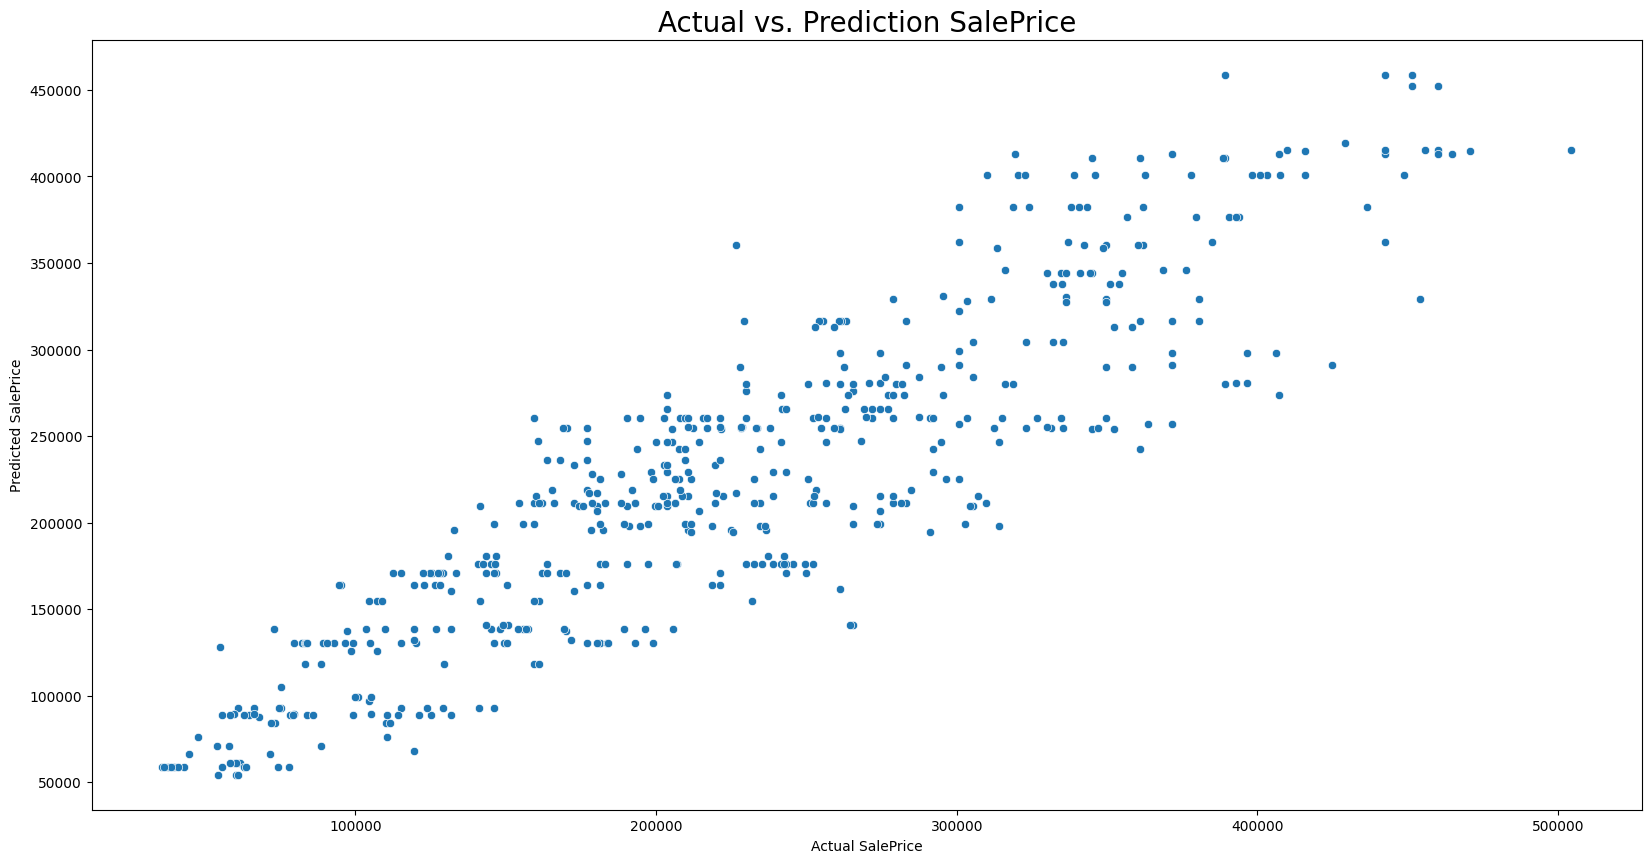

In [33]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=y_test, y=y_pred_rf_tuning)
plt.title('Actual vs. Prediction SalePrice', size=20)
plt.xlabel('Actual SalePrice'),
plt.ylabel('Predicted SalePrice');

## Feature Importance


In [37]:
feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out(), 
                           columns=['Value']).sort_values(by='Value', ascending=False)

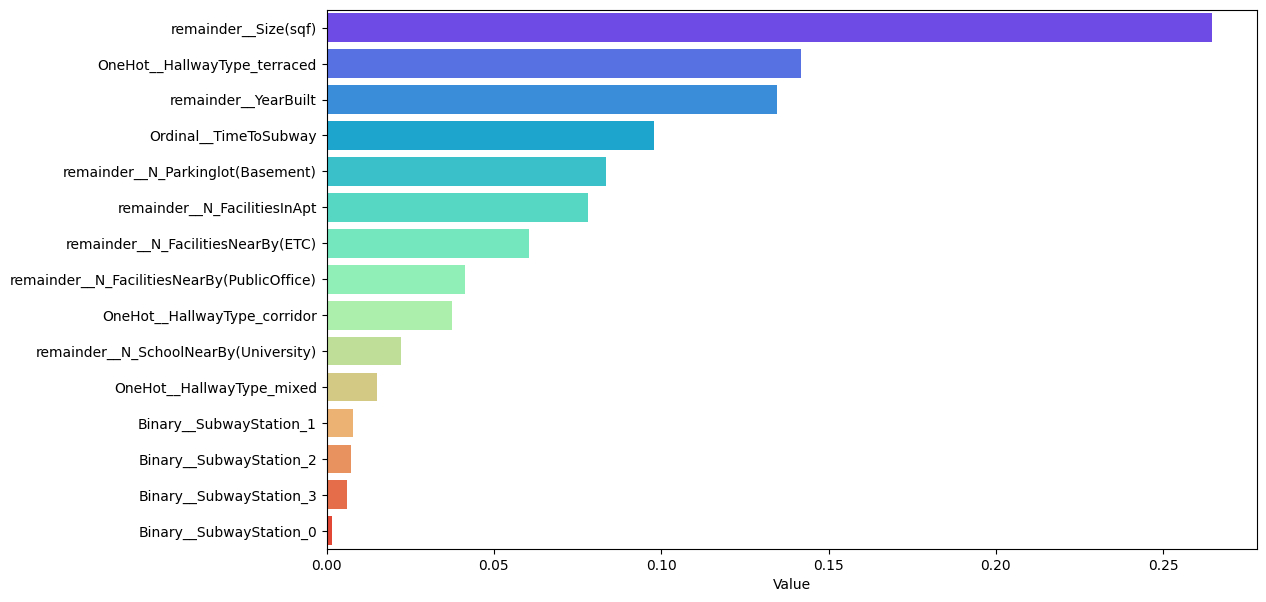

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(data=feature_imp, x='Value', y=feature_imp.index, palette='rainbow');

Berdasarkan plot Feature Importance di atas, ukuran luas properti merupakan fitur yang sangat mempengaruhi harga jual apartment. Mungkin ini sama seperti diagram korelasi di awal, Kemudian diikuti oleh tahun pembuatan dan juga tipe hallway terraced yang hampir sama besar berpengaruh. Tipe hallway terraced merupakan tipe apartemen terbaru sehingga logis nilai pengaruhnya sama besar dengan tahun pembuatan properti tersebut.

# Conclusion and Recomendation

## Conclusion

1.   Permasalahan dalam menentukan harga yang pas dapat diselesaikan denggan metode machine learning dengan berdasarkan riwayat data-data penjualan properti sebelumnya menggunakan algoritma XGBoost yang sudah dituning dengan nilai MAE 36027 yang artinya rata-rata kesalahan prediksi antara nilai prediksi dan nilai sebenarnya adalah sekitar 36027 won yang mana angka ini cukup akurat.

2.   Model ini memiliki limitasi ketika harga yang diprediksi diatas 521901 won dan juga apabila luas properti yang diprediksi melebihi 1803 sqrft sesuai dengan project limitation yang ditentukan ketika menangani outliers.
 
3.  Dampak dari mode machine learning terhadap permasalahannya cukup banyak antara lain :
  *   Keputusan Investasi

    MAE dapat berdampak pada keputusan investasi dalam bisnis properti. Jika model prediksi memiliki MAE yang rendah, investor dapat mempercayai prediksi tersebut dan menggunakan informasi tersebut untuk membuat keputusan investasi yang lebih baik. Misalnya, jika model prediksi memberikan perkiraan harga apartemen yang dekat dengan harga sebenarnya (nilai MAE yang rendah), investor dapat menggunakan informasi tersebut untuk membeli, menjual, atau menyewa apartemen dengan lebih efektif.

  *   Pengembangan Produk

    MAE dapat digunakan untuk memperbaiki dan mengembangkan model prediksi harga apartemen. Jika nilai MAE tinggi, ini menunjukkan bahwa model memiliki tingkat kesalahan yang besar dalam memprediksi harga. Dalam hal ini, perusahaan atau tim pengembang dapat menggunakan MAE sebagai pedoman untuk meningkatkan model dan menerapkan perbaikan yang diperlukan. Tujuan jangka panjangnya adalah mengurangi nilai MAE agar prediksi menjadi lebih akurat dan berguna dalam konteks bisnis.

  *   Evaluasi yang lebih realistis

    Evaluasi yang lebih realistis: MAE memberikan penilaian yang lebih realistis terhadap kinerja model dalam memprediksi harga apartemen. Dalam konteks bisnis, tingkat kesalahan yang diterima mungkin bervariasi tergantung pada industri, lokasi, atau ukuran apartemen. MAE memungkinkan pemahaman yang lebih baik tentang tingkat kesalahan rata-rata yang dapat diterima dalam prediksi harga apartemen tersebut.

## Recomendation


1. Mempertimbangkan untuk menambahkan feature yang memiliki hubungan yang lebih kuat terhadap harga apartment di Daegu, Korea Selatan secara langsung seperti pada lantai berapa apartement tersebut berada, tahun penjualan apartment, jumlah ruangan di dalam apartment (jumlah kamar tidur, kamar mandi, dapur), informasi inklusivitas furniture di dalam apartment, dan lain sebagainya.

2. Mempertimbangkan faktor eksternal yang secara keseluruhan dapat berdampak pada harga pasar apartment di Daegu, Korea Selatan seperti suku bunga, Indeks Harga Konsumen (IHK), kinerja Produk Domestik Bruto (PDB), dan lain sebagainya.

3. Memperluas dataset dengan mengumpulkan lebih banyak data yang memiliki informasi yang lebih update terkait harga apartment Daegu, Korea Selatan untuk meningkatkan relevansi dataset pada saat membangun model prediksi sehingga dapat menghasilkan akurasi model prediksi yang lebih baik dan membantu meningkatkan model regresi untuk mempelajari pola-pola dalam data.

4. Model RandomForest yang merupakan model final yang dipilih untuk membantu agen real estate dalam melakukan prediksi harga apartment di Daegu, Korea Selatan sebaiknya digunakan untuk memprediksi harga minimal apartment sebesar 32.743 won dan harga maksimal apartment sebesar 686.840 won.


In [39]:
# #Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', RandomForestRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Daegu_XGB.sav', 'wb'))

